数据加载（原始方式）

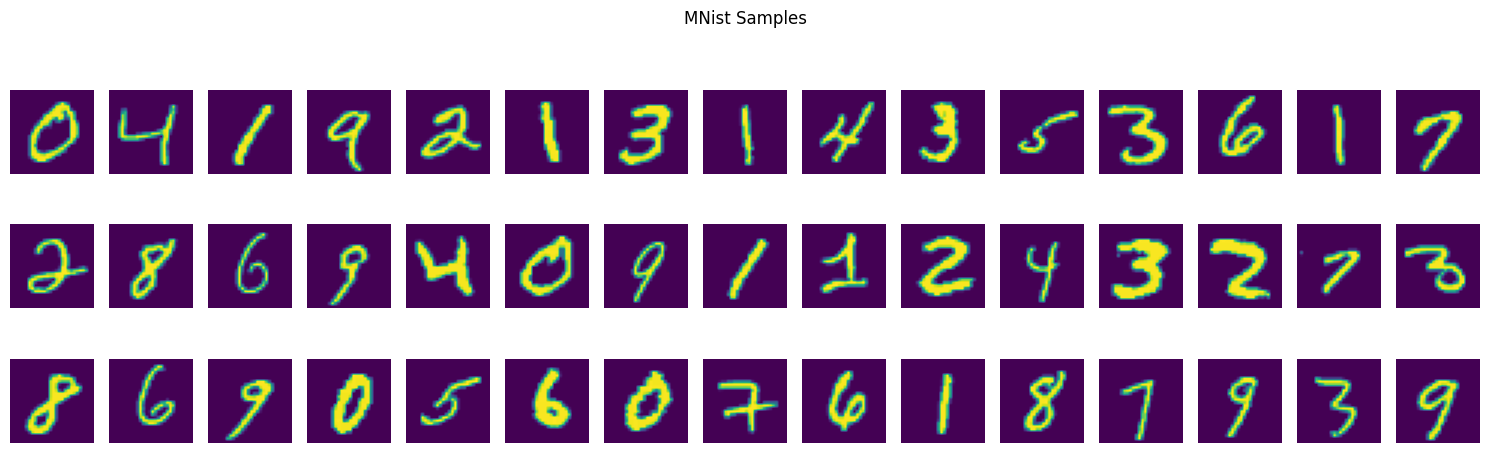

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

nrows = 3
ncolos = 15
training_datalist = list(training_data)

fig, axs = plt.subplots(nrows=nrows, ncols=ncolos, figsize=(15,5))
fig.suptitle('MNist Samples')
for row_index in range(nrows):
    for col_index in range(ncolos):
        fig_index = row_index*ncolos+col_index
        x,y = training_datalist[fig_index+1]
        axs[row_index,col_index].imshow(x.reshape(28,28))#,cmap="gray"
        axs[row_index,col_index].set_title=np.argmax(y.flatten())
        axs[row_index,col_index].axis('off')

plt.tight_layout()
# plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

模型训练（原始方式）

In [ ]:
import mnist_loader
import network
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)

net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

数据加载（Pytorch方式）

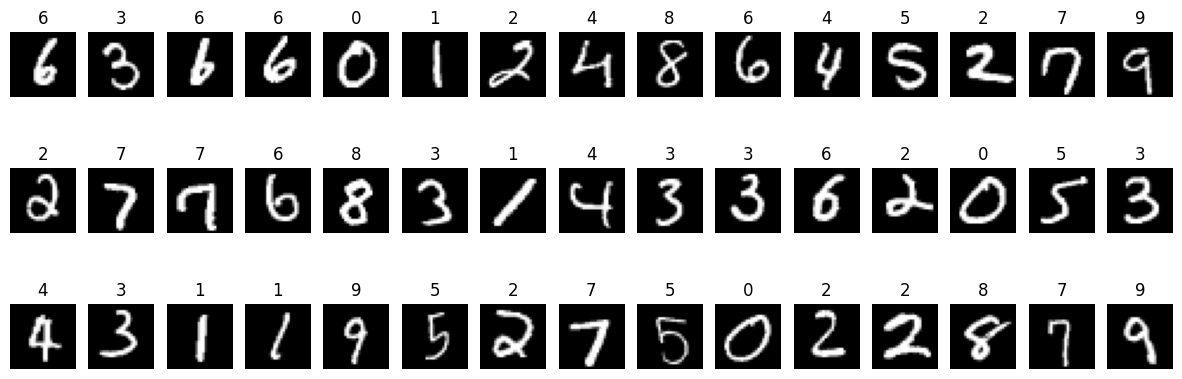

In [14]:
import mnist_loader
from mnist_loader import MNISTDataset

import numpy as np
import matplotlib.pyplot as plt

import torch

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

train_dataset = MNISTDataset(list(training_data))
validate_dataset = MNISTDataset(list(validation_data))
test_dataset = MNISTDataset(list(test_data))

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(15,5))
cols, rows = 15, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    # sample_idx = i
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[np.argmax(label.flatten())])
    plt.axis("off")
    plt.imshow(img.reshape(28,28), cmap="gray")
plt.show()



Feature batch shape: torch.Size([10, 784, 1])
Labels batch shape: torch.Size([10, 10, 1])
Feature batch shape: torch.Size([784])
Labels batch shape: torch.Size([10])


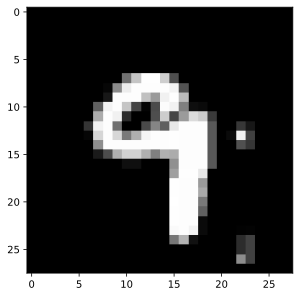

Label: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)


In [2]:
import network_pt
import matplotlib.pyplot as plt

train_dataloader, validate_dataloader, test_dataloader = network_pt.mnist_dataloader()

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0].squeeze()
print(f"Feature batch shape: {img.size()}")
print(f"Labels batch shape: {label.size()}")
plt.imshow(img.reshape(28,28), cmap="gray")
plt.show()
print(f"Label: {label}")

模型训练（Pytorch方式）

Finished Training


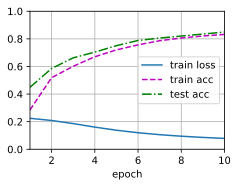

In [1]:
import network_pt

network_pt.train()

In [11]:
import torch
import numpy as np
from d2l import torch as d2l

X = torch.rand(12)
print(X, X.argmax())
Y = torch.tensor([1,2,3])
print(Y.unsqueeze(1).size())
print((1,2)+(3,))

y_hat = torch.tensor([[1.0, 2, 4, 8],[7.0, 9, 1, 8]])

y_hat = d2l.argmax(y_hat, axis=1)
print(y_hat)


tensor([0.7706, 0.6589, 0.7386, 0.0454, 0.0894, 0.4201, 0.4345, 0.9782, 0.2808,
        0.5963, 0.9405, 0.2460]) tensor(7)
torch.Size([3, 1])
(1, 2, 3)
tensor([3, 1])
